Found 84 images belonging to 2 classes.
Found 204 images belonging to 2 classes.


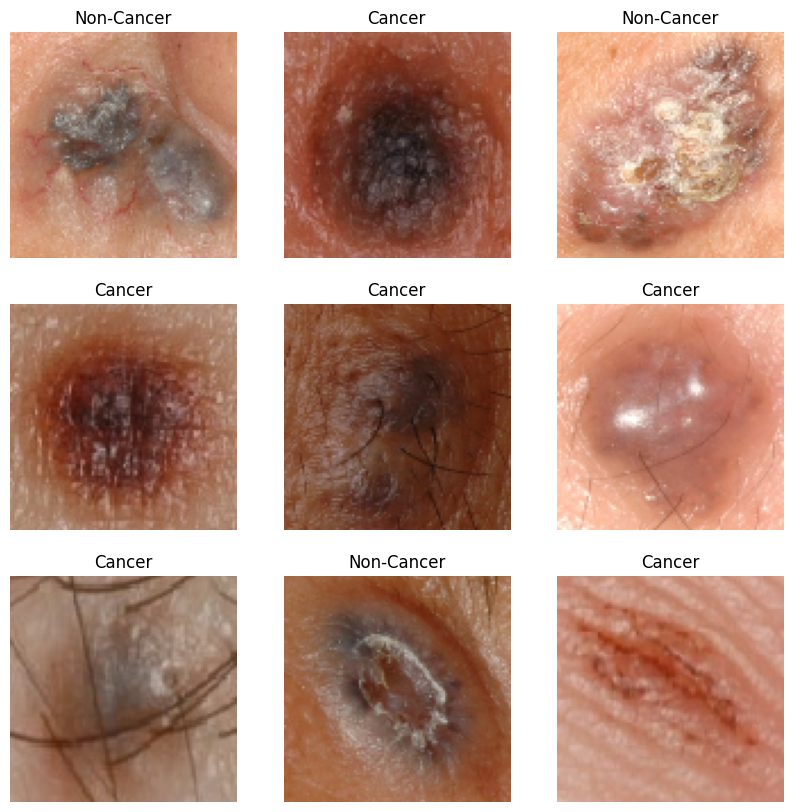

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Define paths
train_dir = '../../Skin_Data/Train'
test_dir = '../../Skin_Data/Test'

# Set up ImageDataGenerator for training
train_datagen = ImageDataGenerator(
    rescale=1./255,   # Normalize images
)

# Set up ImageDataGenerator for testing (no data augmentation here)
test_datagen = ImageDataGenerator(
    rescale=1./255    # Normalize images
)

# Prepare iterators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(100, 100),  # Resize images to 100x100
    batch_size=32,
    class_mode='binary',  # for binary classification
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(100, 100),
    batch_size=32,
    class_mode='binary',
)

# Function to visualize images
def plot_images(images, labels):
    plt.figure(figsize=(10, 10))
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        plt.title('Cancer' if labels[i] == 1 else 'Non-Cancer')
        plt.axis("off")
    plt.show()

# Fetch a batch of images from the train generator
images, labels = next(train_generator)
plot_images(images, labels)


2024-04-30 22:07:51.564684: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:274] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 14s 0us/step
Epoch 1/10


/home/reese_quinto/.local/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


3/3 ━━━━━━━━━━━━━━━━━━━━ 16s 7s/step - accuracy: 0.5112 - loss: 0.7062 - val_accuracy: 0.2113 - val_loss: 0.8534
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 3/10


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


3/3 ━━━━━━━━━━━━━━━━━━━━ 13s 6s/step - accuracy: 0.5227 - loss: 0.6718 - val_accuracy: 0.5060 - val_loss: 0.7024
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 13s 6s/step - accuracy: 0.7255 - loss: 0.6197 - val_accuracy: 0.7560 - val_loss: 0.5874
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 13s 6s/step - accuracy: 0.7505 - loss: 0.5659 - val_accuracy: 0.7455 - val_loss: 0.5782
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 9/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 13s 6s/step - accuracy: 0.8250 - loss: 0.5362 - val_accuracy: 0.6146 - val_loss: 0.6532
Epoch 10/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - va

/home/reese_quinto/.local/lib/python3.10/site-packages/keras/src/models/model.py:342: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  warnings.warn(


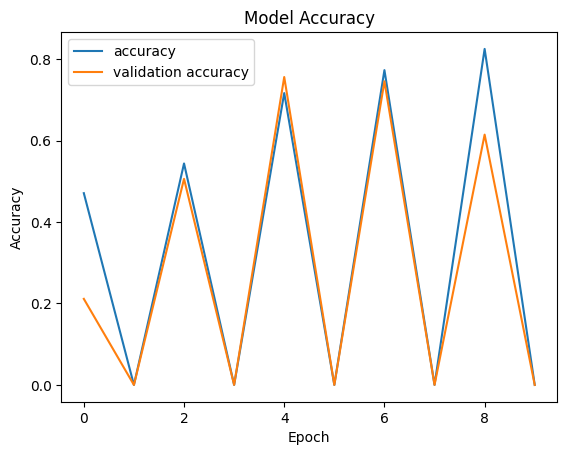

In [3]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Load the pretrained VGG16 model, excluding the top fully connected layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(100, 100, 3))

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Add new classifier layers
flatten_layer = Flatten()(base_model.output)
new_output_layer = Dense(1, activation='sigmoid')(flatten_layer)

# Define the new model
model = Model(inputs=base_model.input, outputs=new_output_layer)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    validation_data=test_generator,
    validation_steps=len(test_generator),
    epochs=10
)

# Save the model
model.save('baseline_skin_cancer_model.h5')

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()
